In [192]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

In [193]:
df = pd.read_csv('../../examples/tips.csv')
df

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [194]:
cross_t = pd.crosstab(df['day'], df['size'])
cross_t

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [195]:
cross_t.sum(1)

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

In [196]:
cross_p = cross_t.div(cross_t.sum(1), axis=0)
cross_p

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


<AxesSubplot:xlabel='day'>

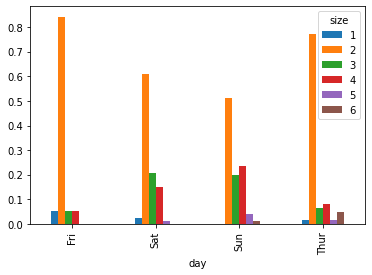

In [197]:
cross_p.plot.bar()

In [198]:
df['t_p'] = (df['tip'] / (df['total_bill'] - df['tip']))
df

,total_bill,tip,smoker,day,time,size,t_p
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<AxesSubplot:xlabel='day', ylabel='t_p'>

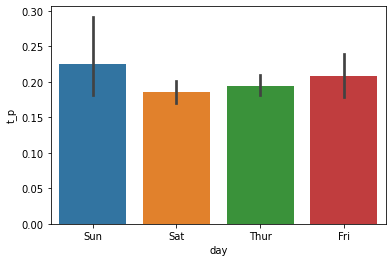

In [199]:
sns.barplot(x='day', y='t_p', data=df)

d:\projects\python\fastapi\test\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

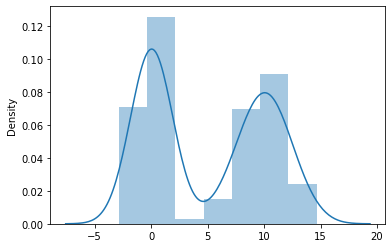

In [200]:
nd1 = np.random.normal(0,1, size=200)
nd2 = np.random.normal(10,2, size=200)
sns.distplot(pd.Series(np.concatenate([nd1, nd2])))

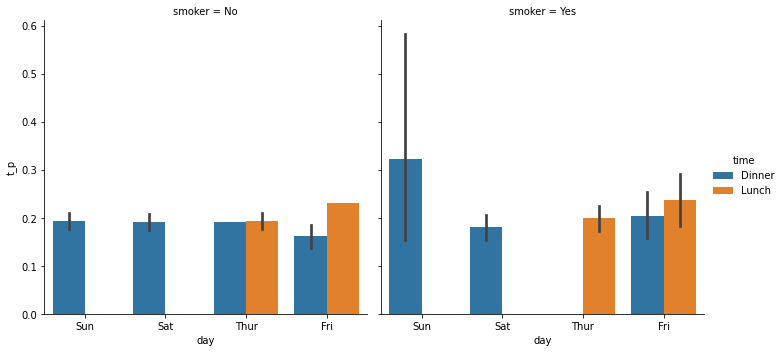

In [201]:
sns.catplot(x='day', y='t_p', hue='time', col='smoker', data=df, kind='bar')

In [202]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                 'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.100326,-0.331036
1,a,two,0.512907,0.008041
2,b,one,0.041600,-0.489152
3,b,two,-0.531204,-2.405063
4,a,one,0.858386,0.561763


In [203]:
gr = df.groupby(by=df['key1'])
gr.mean()

,data1,data2
key1,,
a,0.490540,0.079589
b,-0.244802,-1.447108


In [204]:
gr.size()

key1
a    3
b    2
dtype: int64

In [205]:
df

,key1,key2,data1,data2
0,a,one,0.100326,-0.331036
1,a,two,0.512907,0.008041
2,b,one,0.041600,-0.489152
3,b,two,-0.531204,-2.405063
4,a,one,0.858386,0.561763


In [206]:
for k,v in gr:
    print(k)
    print(v)

a
  key1 key2     data1     data2
0    a  one  0.100326 -0.331036
1    a  two  0.512907  0.008041
4    a  one  0.858386  0.561763
b
  key1 key2     data1     data2
2    b  one  0.041600 -0.489152
3    b  two -0.531204 -2.405063


In [207]:
df.groupby(['key1', 'key2'])['data2'].mean()

key1  key2
a     one     0.115364
      two     0.008041
b     one    -0.489152
      two    -2.405063
Name: data2, dtype: float64

In [208]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.115364
     two   0.008041
b    one  -0.489152
     two  -2.405063

In [209]:
people = pd.DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.loc[2:3, ['b', 'c']] = np.nan
people

C:\Users\asargsyan\AppData\Local\Temp\ipykernel_9956\3729267243.py:4: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  people.loc[2:3, ['b', 'c']] = np.nan


,a,b,c,d,e
Joe,-1.113446,1.063958,0.667348,-0.489066,-0.315711
Steve,0.675624,-0.039477,-1.758820,-0.596553,-0.940131
Wes,-0.499985,NaN,NaN,-0.346289,0.498567
Jim,0.607428,-0.359745,2.439071,0.728427,-1.015001
Travis,2.178852,1.362897,-0.055557,1.034318,1.123335


In [210]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
            'd': 'blue', 'e': 'red', 'f' : 'orange'}

c_m = people.groupby(by=mapping, axis=1)
c_m.all()

,blue,red
Joe,True,True
Steve,True,True
Wes,True,True
Jim,True,True
Travis,True,True


In [211]:
c_m.sum()

,blue,red
Joe,0.178282,-0.365199
Steve,-2.355373,-0.303984
Wes,-0.346289,-0.001418
Jim,3.167498,-0.767318
Travis,0.978761,4.665084


In [212]:
people['aa'] = people['a'] - people['b']
people.groupby(len, axis=1).count()

,1,2
Joe,5,1
Steve,5,1
Wes,3,0
Jim,5,1
Travis,5,1


In [213]:
df = pd.read_csv('../../examples/tips.csv')
df['t_p'] = df['tip']/df['total_bill']
df

,total_bill,tip,smoker,day,time,size,t_p
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [214]:
gr = df.groupby(['day', 'smoker'])
p_ = gr.agg('mean')['t_p']
p_

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: t_p, dtype: float64

<AxesSubplot:xlabel='day,smoker', ylabel='MEAN'>

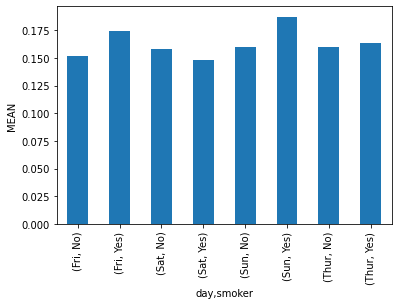

In [215]:
p_.plot.bar(ylabel='MEAN')

In [216]:
gr['smoker'].sum()

day   smoker
Fri   No                                                 NoNoNoNo
      Yes           YesYesYesYesYesYesYesYesYesYesYesYesYesYesYes
Sat   No        NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
      Yes       YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...
Sun   No        NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
      Yes       YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...
Thur  No        NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
      Yes       YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...
Name: smoker, dtype: object

<AxesSubplot:xlabel='day', ylabel='mean value'>

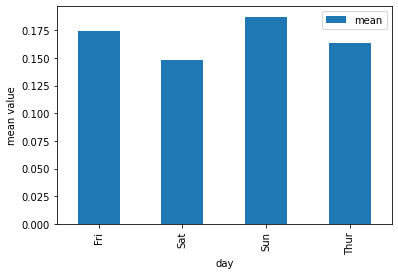

In [217]:
df[df['smoker'] == 'Yes'].groupby(['day'])['t_p'].agg(['mean']).plot.bar(ylabel='mean value')

In [218]:
fs = ['count', 'mean', 'max']
res = gr['t_p', 'total_bill'].agg(fs)

res

C:\Users\asargsyan\AppData\Local\Temp\ipykernel_9956\4222406472.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res = gr['t_p', 'total_bill'].agg(fs)


t_p                     total_bill                  
            count      mean       max      count       mean    max
day  smoker                                                       
Fri  No         4  0.151650  0.187735          4  18.420000  22.75
     Yes       15  0.174783  0.263480         15  16.813333  40.17
Sat  No        45  0.158048  0.291990         45  19.661778  48.33
     Yes       42  0.147906  0.325733         42  21.276667  50.81
Sun  No        57  0.160113  0.252672         57  20.506667  48.17
     Yes       19  0.187250  0.710345         19  24.120000  45.35
Thur No        45  0.160298  0.266312         45  17.113111  41.19
     Yes       17  0.163863  0.241255         17  19.190588  43.11

<AxesSubplot:xlabel='day,smoker'>

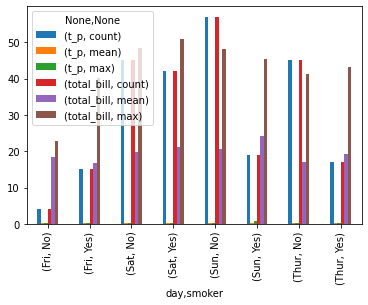

In [219]:
res.plot.bar()

In [220]:
res['t_p']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [221]:
res['t_p'].loc['Fri',:].loc['No', :]

count    4.000000
mean     0.151650
max      0.187735
Name: No, dtype: float64

In [222]:
df

,total_bill,tip,smoker,day,time,size,t_p
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [223]:
df.groupby(lambda x: x).sum()

,total_bill,tip,size,t_p
0,16.99,1.01,2,0.059447
1,10.34,1.66,3,0.160542
2,21.01,3.50,3,0.166587
3,23.68,3.31,2,0.139780
4,24.59,3.61,4,0.146808
...,...,...,...,...
239,29.03,5.92,3,0.203927
240,27.18,2.00,2,0.073584
241,22.67,2.00,2,0.088222
242,17.82,1.75,2,0.098204


In [224]:
df.pct_change()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [225]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.913457
2011-01-05   -0.955026
2011-01-07   -2.133152
2011-01-08    0.779401
2011-01-10   -0.160160
2011-01-12   -0.561203
dtype: float64

In [226]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [227]:
dup_ts.groupby(level=0).sum()

2000-01-01    0
2000-01-02    6
2000-01-03    4
dtype: int32

In [233]:
resempler = ts.resample('D')
resempler


In [237]:
t = pd.Series(np.arange(len(resempler)), index=resempler.keys)
t

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
dtype: int32

In [238]:
ts

2011-01-02    0.913457
2011-01-05   -0.955026
2011-01-07   -2.133152
2011-01-08    0.779401
2011-01-10   -0.160160
2011-01-12   -0.561203
dtype: float64

In [239]:
ts.shift(2)

2011-01-02         NaN
2011-01-05         NaN
2011-01-07    0.913457
2011-01-08   -0.955026
2011-01-10   -2.133152
2011-01-12    0.779401
dtype: float64

In [240]:
ts.shift(2, freq='M')

2011-02-28    0.913457
2011-02-28   -0.955026
2011-02-28   -2.133152
2011-02-28    0.779401
2011-02-28   -0.160160
2011-02-28   -0.561203
dtype: float64

In [242]:
ts.asfreq('M')

Series([], Freq: M, dtype: float64)

In [243]:
data = pd.read_csv('../../examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [245]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [246]:
data.index = index

In [247]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [266]:
data.resample('Y').mean()['infl'].sort_values().describe()

count    51.000000
mean      3.954771
std       2.790487
min      -0.150000
25%       2.038750
50%       3.205000
75%       4.825000
max      12.987500
Name: infl, dtype: float64

In [278]:
data.resample('Y')['infl'].ohlc().sort_values(by=['high','low'])

,open,high,low,close
1961,-0.40,1.47,-0.40,0.80
1964,0.13,2.05,0.13,2.05
1962,2.26,2.26,0.13,0.79
2001,1.82,2.26,0.23,0.23
1998,0.49,2.46,0.49,1.95
1960,2.31,2.70,0.14,1.21
1997,1.25,2.73,1.24,1.24
1959,0.00,2.74,0.00,0.27
1963,0.53,2.75,0.53,2.46
1965,1.28,2.90,0.89,2.90


In [313]:
data.resample('Y')['infl'].ohlc().sort_index()['2000':]

,open,high,low,close
2000,3.76,4.19,2.77,3.89
2001,1.82,2.26,0.23,0.23
2002,3.59,3.59,1.56,3.08
2003,1.31,3.02,1.09,3.02
2004,2.35,3.61,2.09,2.09
2005,4.15,9.14,0.40,0.40
2006,2.60,3.97,-1.58,3.30
2007,4.58,6.38,2.75,6.38
2008,2.82,8.53,-8.79,-8.79
2009,0.94,3.56,0.94,3.56


<AxesSubplot:xlabel='Year', ylabel='Infl'>

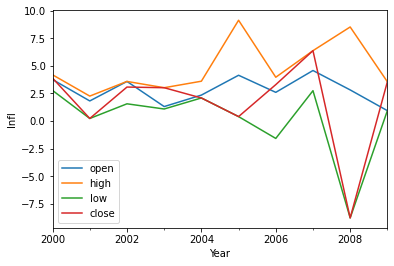

In [320]:
data.resample('Y')['infl'].ohlc().sort_index()['2000':].plot(ylabel='Infl', xlabel='Year')

<AxesSubplot:xlabel='Year', ylabel='Infl'>

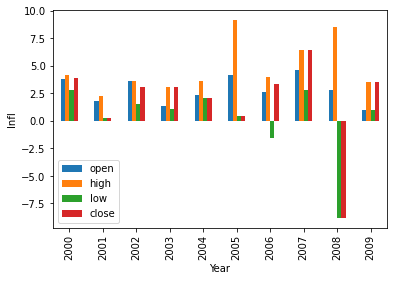

In [321]:
data.resample('Y')['infl'].ohlc().sort_index()['2000':].plot.bar(ylabel='Infl', xlabel='Year')

In [322]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4, 'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [324]:
df.groupby('key').mean()

,value
key,
a,4.5
b,5.5
c,6.5


In [330]:
df.groupby('key')

In [332]:
df.groupby('key').transform(lambda x: x.mean())

,value
0,4.5
1,5.5
2,6.5
3,4.5
4,5.5
5,6.5
6,4.5
7,5.5
8,6.5
9,4.5


In [348]:
df['value'].transform(lambda x: x*2) - df['value'].transform(lambda x: x)

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
Name: value, dtype: float64

In [349]:
df.assign(k='1')

,key,value,k
0,a,0.0,1
1,b,1.0,1
2,c,2.0,1
3,a,3.0,1
4,b,4.0,1
5,c,5.0,1
6,a,6.0,1
7,b,7.0,1
8,c,8.0,1
9,a,9.0,1


In [350]:
data = pd.DataFrame({
      'x0': [1, 2, 3, 4, 5],
     'x1': [0.01, -0.01, 0.25, -4.1, 0.],
      'y': [-1.5, 0., 3.6, 1.3, -2.]})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [352]:
df3 = data.copy()
df3['strgs'] = list('abcde')
df3

,x0,x1,y,strgs
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.0,e


In [361]:
data['categor'] = pd.Categorical(list('abacb'), categories=list('abc'))
data

,x0,x1,y,categor
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,c
4,5,0.00,-2.0,b


In [362]:
dm = pd.get_dummies(data.categor, prefix='categor')
dm

,categor_a,categor_b,categor_c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0


In [358]:
dt = data.drop('categor', axis=1).join(dm)
dt

,x0,x1,y,categor_a,categor_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1
